In [1]:
import pandas as pd

df = pd.read_csv('/content/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# EDA

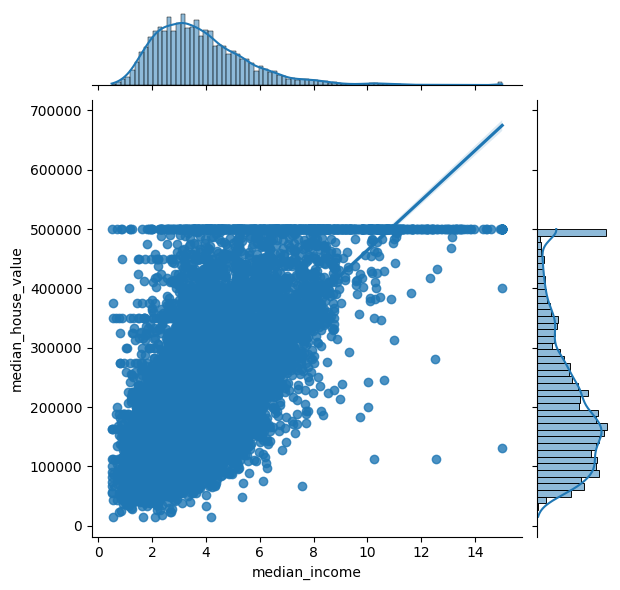

In [6]:
import seaborn as sns
sns.jointplot(data=df, x="median_income", y="median_house_value", kind="reg")

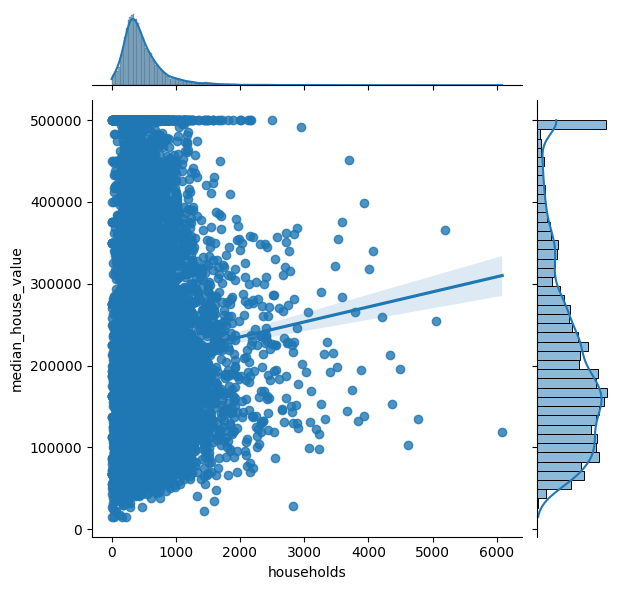

In [7]:
sns.jointplot(data=df, x="households", y="median_house_value", kind="reg")

<Axes: >

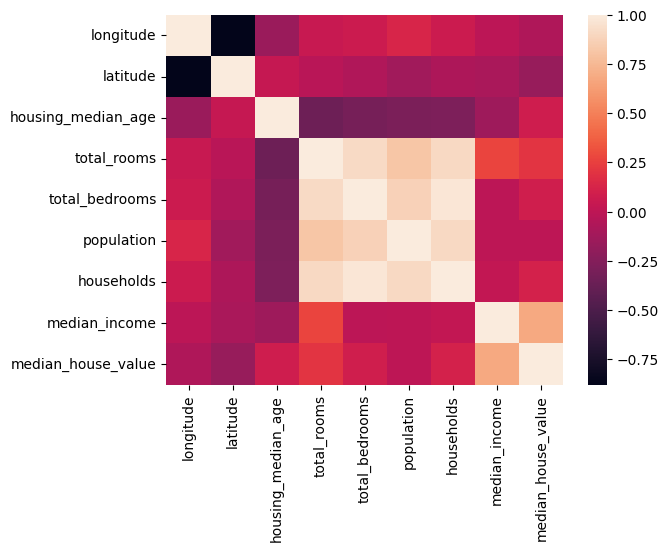

In [12]:
sns.heatmap(df.corr("spearman"))

<Axes: >

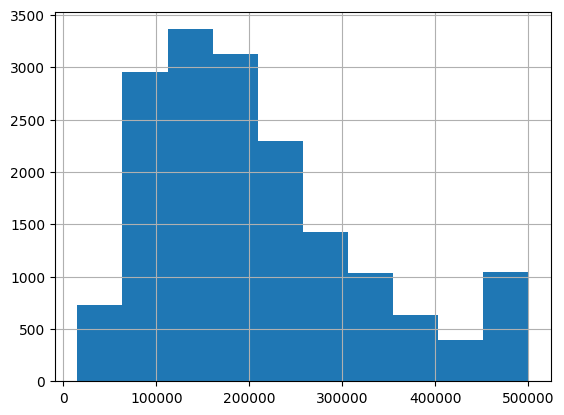

In [13]:
df['median_house_value'].hist()

# Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=['longitude','latitude',	'housing_median_age',	'total_rooms'	,'total_bedrooms',	'population',	'households',	'median_income',	'median_house_value'])
df_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled[df_scaled.columns[:-1]], 
    df_scaled['median_house_value'],
    test_size=0.2)

# Regressors

In [26]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

In [27]:
lin = LinearRegression().fit(X_train, y_train)
l2 = RidgeCV().fit(X_train, y_train)
l1 = LassoCV().fit(X_train, y_train)

In [28]:
lin_pred = lin.predict(X_test)
l2_pred = l2.predict(X_test)
l1_pred = l1.predict(X_test)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

print("lin r2: ", r2_score(y_test, lin_pred))
print("lin mse: ", mean_squared_error(y_test, lin_pred))
print("l2 default r2: ", r2_score(y_test, l2_pred))
print("l2 default mse: ", mean_squared_error(y_test, l2_pred))
print("l1 default r2: ", r2_score(y_test, l1_pred))
print("l1 default mse: ", mean_squared_error(y_test, l1_pred))

lin r2:  0.647776469802675
lin mse:  0.020222776630074227
l2 default r2:  0.647415210388306
l2 default mse:  0.0202435181984703
l1 default r2:  0.6472879838769703
l1 default mse:  0.02025082285900427


In [55]:
l2 = RidgeCV(alphas=[0.00001]).fit(X_train, y_train)
l2_pred = l2.predict(X_test)
print("l2 r2: ", r2_score(y_test, l2_pred))
print("l2 mse: ", mean_squared_error(y_test, l2_pred))

l2 r2:  0.6477764352901536
l2 mse:  0.020222778611597183


The best alpha parametar for ridge regression i found is 0.00001

In [63]:
l1 = LassoCV().fit(X_train, y_train)
l1_pred = l1.predict(X_test)
print("l1 r2: ", r2_score(y_test, l1_pred))
print("l1 mse: ", mean_squared_error(y_test, l1_pred))
l1.alpha_

l1 r2:  0.6472879838769703
l1 mse:  0.02025082285900427


2.1835088292667065e-05

The best alpha parametar for lasso regression was automaticlly found to be 0.0000218